# **Importing the necessary libraries**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential

In [3]:
## Load and prepare the Fashion MNIST dataset

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Data Preprocessing**

In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print("Train Images:", len(train_images))
print("Train labels:", len(train_labels))

Train Images: 60000
Train labels: 60000


In [7]:
print(train_images[0].shape)

(28, 28)


In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [9]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


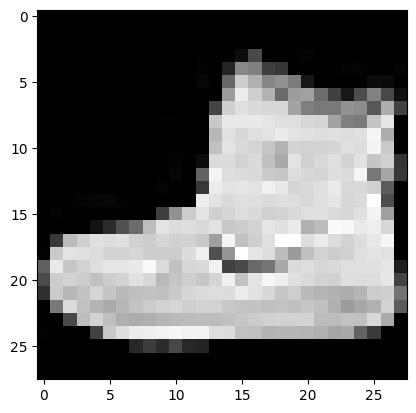

In [10]:
## Display the image from the dataset

plt.imshow(train_images[0], cmap ='gray')
plt.show()

In [11]:
print(train_labels[0])

9


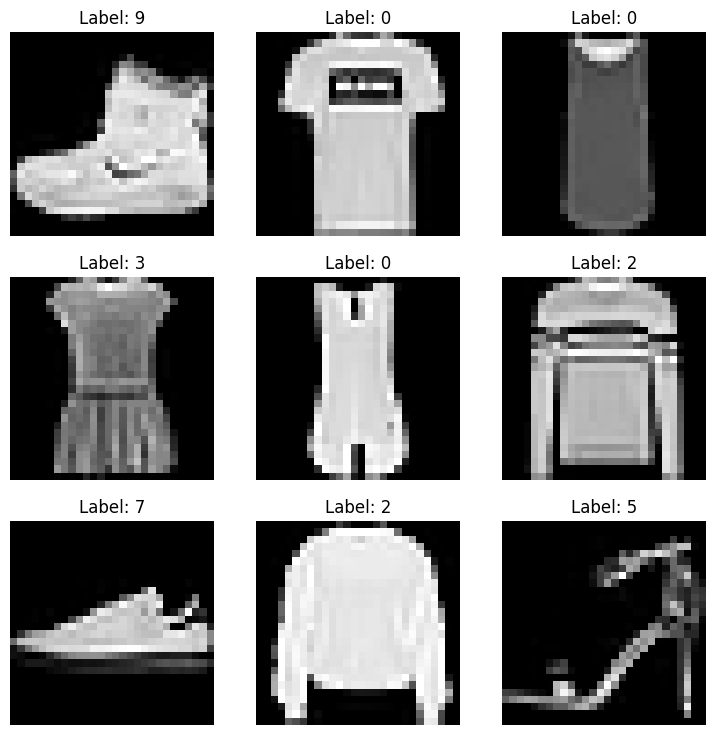

In [33]:
plt.figure(figsize=(9, 9))  # Set the figure size

for i in range(9):  # Loop to display 9 images
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid, and index starts from 1
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for display
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Hide the axis for clarity

plt.show()

## **Data Normalization**

In [12]:
train_images, test_images = train_images/255, test_images/255

In [14]:
## reshape images to specify that its a single channe (grayscale)

train_images = train_images.reshape((train_images.shape[0], 28,28,1))
test_images = test_images.reshape((test_images.shape[0], 28,28,1))

In [16]:
print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

Train Images Shape: (60000, 28, 28, 1)
Test Images Shape: (10000, 28, 28, 1)


# **Convolutional Neural Network**

In [19]:
model = Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape =(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data =(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7095 - loss: 0.7790 - val_accuracy: 0.8378 - val_loss: 0.4431
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8472 - loss: 0.4184 - val_accuracy: 0.8559 - val_loss: 0.3907
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8721 - loss: 0.3438 - val_accuracy: 0.8704 - val_loss: 0.3529
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8912 - loss: 0.2968 - val_accuracy: 0.8786 - val_loss: 0.3301
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9003 - loss: 0.2726 - val_accuracy: 0.8795 - val_loss: 0.3473
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9074 - loss: 0.2488 - val_accuracy: 0.8928 - val_loss: 0.2975
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9141 - loss: 0.2289 - val_accuracy: 0.8838 - val_loss: 0.3340
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9213 - loss: 0.2111

In [27]:
## Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test Accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8969 - loss: 0.3112
Test Accuracy: 0.8968999981880188


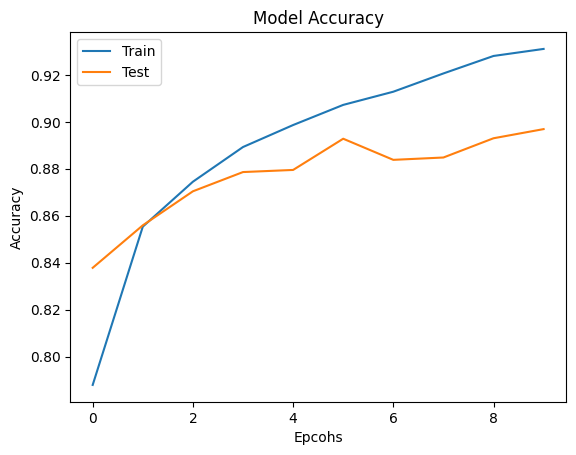

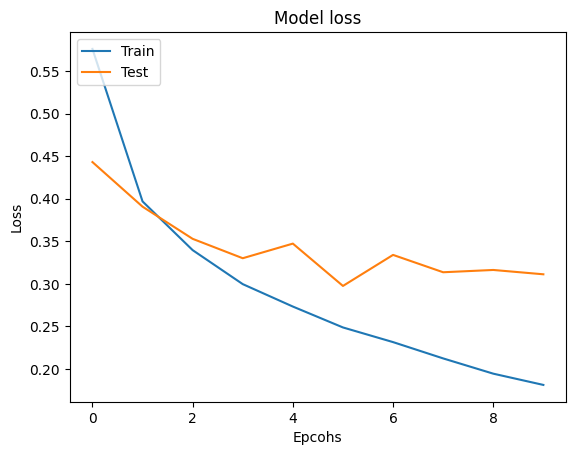

In [29]:
## Plot the training and validation accuracy results

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


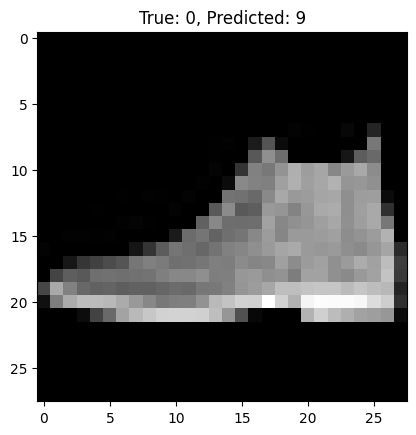

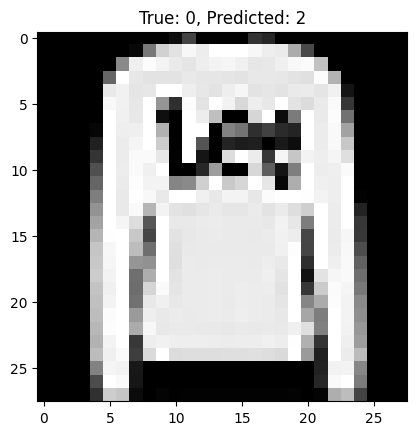

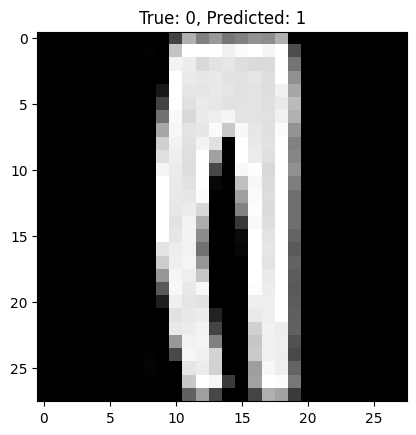

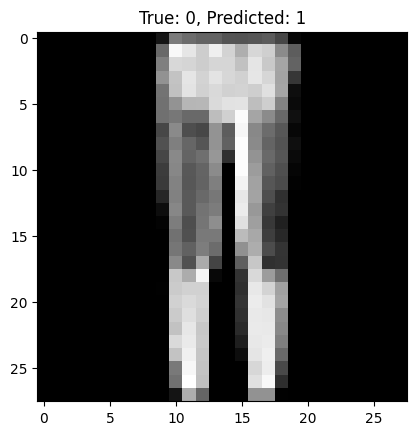

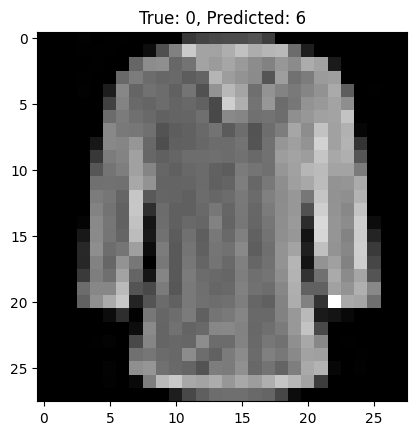

In [30]:
## making predictions

predictions = model.predict(test_images)
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])  # Get the predicted class (max probability)
    true_label = np.argmax(test_labels[i])      # Get the true class (from one-hot encoded labels)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()

In [34]:
model.save('trained_fashion_mnist.h5')